In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [16]:
df = pd.read_excel('../../data_set/hd_sessions/data_labeled.xlsx')

In [17]:
X = df.drop(columns=['target', 'Subject_ID', 'Session_No', 'Date', 'SYS (mmHg)']) 
y = df['target']   

In [18]:
X.columns

Index(['AP (mmHg)', 'AUF (ml)', 'BFR (ml/min)', 'Dry weight (kg)',
       'HD duration (h)', 'PUF (ml)', 'Post HD weight (kg)',
       'Pre HD weight (kg)', 'TMP (mmHg)', 'VP (mmHg)', 'Weight gain (kg)',
       'DIA (mmHg)'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())

Class distribution in training set:
target
0    3073
1      11
Name: count, dtype: int64


In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9961139896373057

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       0.00      0.00      0.00         3

    accuracy                           1.00       772
   macro avg       0.50      0.50      0.50       772
weighted avg       0.99      1.00      0.99       772



C:\Users\Lakshitha Kaveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lakshitha Kaveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lakshitha Kaveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [25]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[769   0]
 [  3   0]]


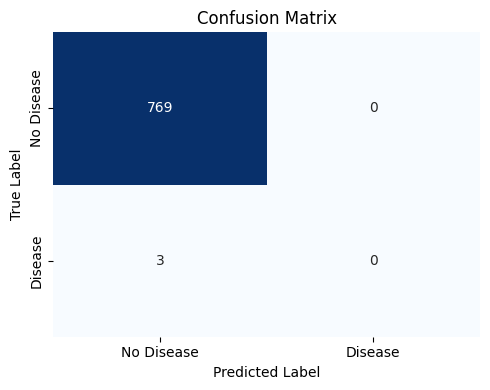

In [28]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()